# **MODULO 2**

**Curso:** Ciencia y analitica de Datos  
**Matricula:** A01793718  
**Nombre:** Cristian Reynaldo Miranda Jimenez  



## **Pre-Processing Data in Python**

This is the process of prepare data for futher analysis. This process is also known as Data Cleaning or Data Wrangling

## **Dealing with missing values in Python**

Missing values occur when no data value is stored for a variable in an observation. This is represented as '?','N/A', 0  or blank.  
  
To deal missing:  
- Drop missing values
- Replace missing values (average, median,mode or other function)
- Leave it as missing data

In [9]:
import pandas as pd
import numpy as np

# dictionary of lists
dict = {'Col1':[100, 90, np.nan, 95],
        'Col2': [30, 45, 56, np.nan],
        'Col3':[np.nan, 40, 80, 98]}
 
# creating a dataframe from list
df = pd.DataFrame(dict)
 
# using isnull() function 
df.head()

,Col1,Col2,Col3
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [8]:
# Delete all rows with na
df.dropna()

,First Score,Second Score,Third Score
1,90.0,45.0,40.0


In [12]:
# Delete specifics rows of columns with na
df.dropna(subset=["Col3"], axis=0, inplace=True) # inplace to modify directly the dataframe
df

,Col1,Col2,Col3
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [13]:
# Replace missing data
df.replace(np.nan, 3)

,Col1,Col2,Col3
1,90.0,45.0,40.0
2,3.0,56.0,80.0
3,95.0,3.0,98.0


In [15]:
# Replace by mean 
m_col1 = df.Col1.mean()
df["Col1"].replace(np.nan,m_col1)

1    90.0
2    92.5
3    95.0
Name: Col1, dtype: float64

## Data Formatting in Python

The idea is to bring data into a common standard of expression . Formatted data is usefull because:
- more clear
- easy to aggregate
- easy to compare


In [ ]:
# converting 

In [51]:
names_auto = ["symboling",
 "normalized_losses",
 "make",
 "fuel_type",
 "aspiration",
 "doors",
 "body_style",
 "drive_wheels",
 "engine_location",
 "wheel_base",
 "length",
 "width",
 "height",
 "curb_weigth",
 "engine_type",
 "cylinders",
 "engine_size",
 "fuel_system",
 "bore",
 "stroke",
 "compression_ratio",
 "horsepower",
 "peak_rpm",
 "city_mpg",
 "highwway_mpg",
 "price"
 ]

autos = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", names=names_auto)
autos.head()

,symboling,normalized_losses,make,fuel_type,aspiration,doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highwway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
# converting mpg to L/100km
autos["city_mpg"] = 235/autos["city_mpg"]
autos.rename(columns={"city_mpg":"city-L/100km"},inplace=True)

In [26]:
autos["price"].tail(5)

200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: object

In [32]:
# check data type format
autos.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
doors                 object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weigth            int64
engine_type           object
cylinders             object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highwway_mpg           int64
price                 object
dtype: object

## **Data Normalization in Python**
The idea of normalization is to make analyses easier and in the same scale.

Ways to normalize data:
- Simple Feature scaling (X_old/X_max)
- Min-Max ((X_old-X_min)/(X_max/X_min))
- Z-score ((X_old-mean)/std)


In [37]:
# Simple Feature scaling 
autos["length"] / autos["length"].max()

# Min-Max 
(autos["length"] - autos["length"].min()) / (autos["length"].max() - autos["length"].min())

# Z-score
( autos["length"] - autos["length"].mean() ) / autos["length"].std()



0     -0.425480
1     -0.425480
2     -0.230948
3      0.206750
4      0.206750
         ...   
200    1.195622
201    1.195622
202    1.195622
203    1.195622
204    1.195622
Name: length, Length: 205, dtype: float64

## **Binning in Python**

Binning is grouping of values into bins   
Convert numeric into categorial variables grouping a set of numerical values into a set of bins  


In [55]:
# example
autos["price"] = autos["price"].replace("?",0).astype(float)

bins = np.linspace(autos["price"].min(),autos["price"].max(),4)
group_names = ["Low",'Medium','High']

df["price-binned"] = pd.cut(autos["price"], bins, labels=group_names, include_lowest = True)
df["price-binned"].unique()

['Medium', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

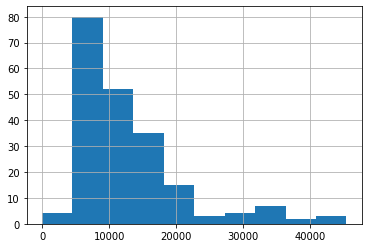

In [57]:
import matplotlib.pyplot as plt

autos["price"].hist()


## **Turning categorical variables into quantitative variables in Python**

The common problem is that most statistical models cannot take the object/string as input. Its necesary to add dummies for each unique category

In [62]:
# Dummies

pd.get_dummies(autos["fuel_type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0
